# Data preparation

In [106]:
import pandas as pd
import numpy as np

df = pd.read_csv('winemag-data-130k-v2.csv')
df = df.drop(columns=['Unnamed: 0', 'taster_twitter_handle'])
df

,country,description,designation,points,price,province,region_1,region_2,taster_name,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
...,...,...,...,...,...,...,...,...,...,...,...,...
129966,Germany,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese,90,28.0,Mosel,NaN,NaN,Anna Lee C. Iijima,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef)
129967,US,Citation is given as much as a decade of bottl...,NaN,90,75.0,Oregon,Oregon,Oregon Other,Paul Gregutt,Citation 2004 Pinot Noir (Oregon),Pinot Noir,Citation
129968,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.0,Alsace,Alsace,NaN,Roger Voss,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Gewürztraminer,Domaine Gresser
129969,France,"A dry style of Pinot Gris, this is crisp with ...",NaN,90,32.0,Alsace,Alsace,NaN,Roger Voss,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss


In [107]:
df.isna().sum()

country           63
description        0
designation    37465
points             0
price           8996
province          63
region_1       21247
region_2       79460
taster_name    26244
title              0
variety            1
winery             0
dtype: int64

In [108]:
df = df.dropna(subset = ['price', 'province', 'country', 'variety'])
df = df.reset_index().drop(columns = ['index'])
df

,country,description,designation,points,price,province,region_1,region_2,taster_name,title,variety,winery
0,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
1,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
2,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
3,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
4,Spain,Blackberry and raspberry aromas show a typical...,Ars In Vitro,87,15.0,Northern Spain,Navarra,NaN,Michael Schachner,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem
...,...,...,...,...,...,...,...,...,...,...,...,...
120910,Germany,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese,90,28.0,Mosel,NaN,NaN,Anna Lee C. Iijima,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef)
120911,US,Citation is given as much as a decade of bottl...,NaN,90,75.0,Oregon,Oregon,Oregon Other,Paul Gregutt,Citation 2004 Pinot Noir (Oregon),Pinot Noir,Citation
120912,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.0,Alsace,Alsace,NaN,Roger Voss,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Gewürztraminer,Domaine Gresser
120913,France,"A dry style of Pinot Gris, this is crisp with ...",NaN,90,32.0,Alsace,Alsace,NaN,Roger Voss,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss


# Analyzing dataset features

In [109]:
print(df.country.value_counts().shape)
df.country.value_counts(dropna = False)

(42,)


US                        54265
France                    17776
Italy                     16914
Spain                      6573
Portugal                   4875
Chile                      4415
Argentina                  3756
Austria                    2799
Australia                  2294
Germany                    2120
New Zealand                1378
South Africa               1293
Israel                      489
Greece                      461
Canada                      254
Hungary                     145
Bulgaria                    141
Romania                     120
Uruguay                     109
Turkey                       90
Georgia                      84
Slovenia                     80
Croatia                      71
Mexico                       70
England                      69
Moldova                      59
Brazil                       47
Lebanon                      35
Morocco                      28
Peru                         16
Ukraine                      14
Macedoni

In [110]:
print(df.designation.value_counts().shape)
df.designation.value_counts(dropna = False)

(35753,)


NaN                                 34767
Reserve                              1977
Estate                               1317
Reserva                              1219
Estate Grown                          618
                                    ...  
Shop Block Vineyard Dutton Ranch        1
Bajoz Ovacion                           1
Archimedes                              1
Estate Bottled Trocken                  1
Kupra                                   1
Name: designation, Length: 35754, dtype: int64

In [111]:
df.points.value_counts(dropna = False).sort_values()

100       19
99        28
98        69
97       207
80       395
96       482
81       680
95      1406
82      1772
83      2886
94      3449
93      5935
84      6097
92      8865
85      8901
91     10559
89     11306
86     11740
90     14354
87     15761
88     16004
Name: points, dtype: int64

In [112]:
print(df.price.value_counts().shape)
print(df.price.min())
print(df.price.max())

(390,)
4.0
3300.0


In [113]:
df.province.value_counts(dropna = False)

California           36104
Washington            8583
Oregon                5359
Tuscany               5128
Bordeaux              4002
                     ...  
Krania Olympus           1
Campanha                 1
Cape South Coast         1
Dealurile Hușilor        1
Arcadia                  1
Name: province, Length: 422, dtype: int64

In [114]:
df.region_1.value_counts()

Napa Valley                      4475
Columbia Valley (WA)             4109
Russian River Valley             3090
California                       2627
Paso Robles                      2327
                                 ... 
Geelong                             1
Sovana                              1
Napa County-Lake County             1
Clairette de Die                    1
Mount Barker & Margaret River       1
Name: region_1, Length: 1204, dtype: int64

In [115]:
df.region_2.value_counts()

Central Coast        10975
Sonoma                9009
Columbia Valley       8058
Napa                  6804
Willamette Valley     3416
California Other      2661
Finger Lakes          1768
Sierra Foothills      1461
Napa-Sonoma           1169
Central Valley        1058
Southern Oregon        913
Oregon Other           724
Long Island            677
North Coast            583
Washington Other       523
South Coast            262
New York Other         231
Name: region_2, dtype: int64

In [116]:
df.taster_name.value_counts()

Roger Voss            20172
Michael Schachner     14944
Kerin O’Keefe          9874
Virginie Boone         9507
Paul Gregutt           9497
Matt Kettmann          6237
Joe Czerwinski         5010
Sean P. Sullivan       4925
Anna Lee C. Iijima     4369
Jim Gordon             4171
Anne Krebiehl MW       3389
Lauren Buzzeo          1712
Susan Kostrzewa        1068
Mike DeSimone           492
Jeff Jenssen            469
Alexander Peartree      413
Carrie Dykes            138
Fiona Adams              27
Christina Pickard         6
Name: taster_name, dtype: int64

In [117]:
df.title.value_counts()

Gloria Ferrer NV Sonoma Brut Sparkling (Sonoma County)          11
Korbel NV Brut Sparkling (California)                            9
Segura Viudas NV Extra Dry Sparkling (Cava)                      8
Gloria Ferrer NV Blanc de Noirs Sparkling (Carneros)             7
Ruinart NV Brut Rosé  (Champagne)                                7
                                                                ..
Walt 2012 Clos Pepe Pinot Noir (Sta. Rita Hills)                 1
Bellangelo 2011 Dry Riesling (Finger Lakes)                      1
Vigneti Villabella 2005  Amarone della Valpolicella Classico     1
Falkner 2000 Reserve Chardonnay (South Coast)                    1
Niner 2006 Fog Catcher Red (Paso Robles)                         1
Name: title, Length: 110582, dtype: int64

In [118]:
df.variety.value_counts()

Pinot Noir                  12785
Chardonnay                  11077
Cabernet Sauvignon           9384
Red Blend                    8466
Bordeaux-style Red Blend     5340
                            ...  
Teroldego Rotaliano             1
Sideritis                       1
Tempranillo-Tannat              1
Ondenc                          1
Malagouzia-Chardonnay           1
Name: variety, Length: 691, dtype: int64

# Dataset statistics and finding correlations

In [119]:
df.describe()

,points,price
count,120915.000000,120915.000000
mean,88.421726,35.368796
std,3.044954,41.031188
min,80.000000,4.000000
25%,86.000000,17.000000
50%,88.000000,25.000000
75%,91.000000,42.000000
max,100.000000,3300.000000


In [120]:
import matplotlib.pyplot as plt
groupedByPoints = df.groupby("points").mean().sort_values("points", ascending = False)
groupedByPoints

groupedByPrice = df.groupby("price").mean().sort_values("price", ascending=False)
groupedByPrice

,points
price,
3300.0,88.000000
2500.0,96.000000
2013.0,91.000000
2000.0,96.500000
1900.0,98.000000
...,...
8.0,84.628924
7.0,84.450346
6.0,84.347458


In [121]:
def add_value_labels(ax, spacing=5):
    """Add labels to the end of each bar in a bar chart.

    Arguments:
        ax (matplotlib.axes.Axes): The matplotlib object containing the axes
            of the plot to annotate.
        spacing (int): The distance between the labels and the bars.
    """

    # For each bar: Place a label
    for rect in ax.patches:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = spacing
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        label = "{:.2f}".format(y_value)

        # Create annotation
        ax.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va)                      # Vertically align label differently for
                                        # positive and negative values.

#This helpful code originates from this website https://stackoverflow.com/questions/28931224/adding-value-labels-on-a-matplotlib-bar-chart

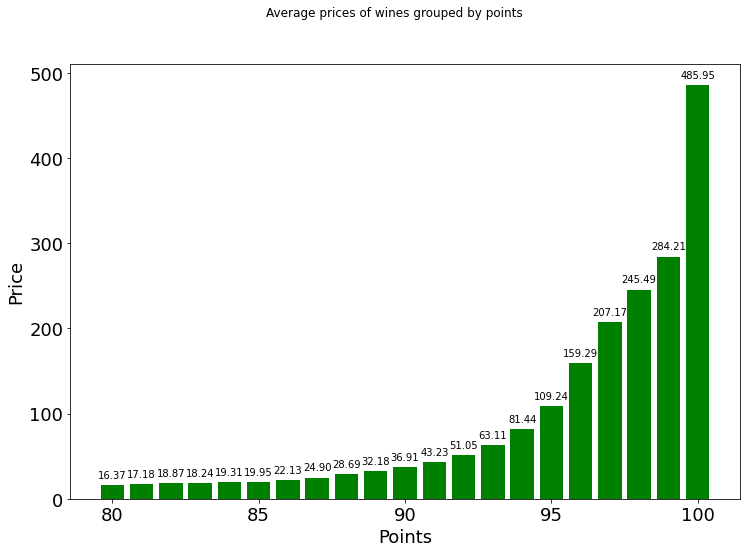

In [122]:
plt.figure(figsize=(12, 8))
plt.bar(groupedByPoints.index, groupedByPoints['price'], align='center', color = 'green')
plt.ylabel('Price', fontsize = 18)
plt.xlabel('Points', fontsize = 18)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
plt.suptitle('Average prices of wines grouped by points')
add_value_labels(plt.gca())
plt.show()

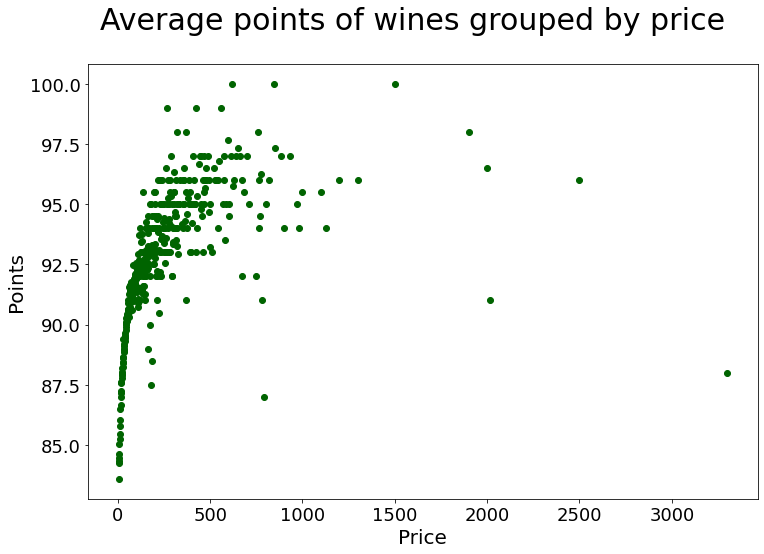

In [123]:
plt.figure(figsize=(12, 8))
plt.scatter(groupedByPrice.index, groupedByPrice['points'], color = 'darkgreen')
plt.ylabel('Points', fontsize = 20)
plt.xlabel('Price', fontsize = 20)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
plt.suptitle('Average points of wines grouped by price', fontsize = 30)
plt.show()

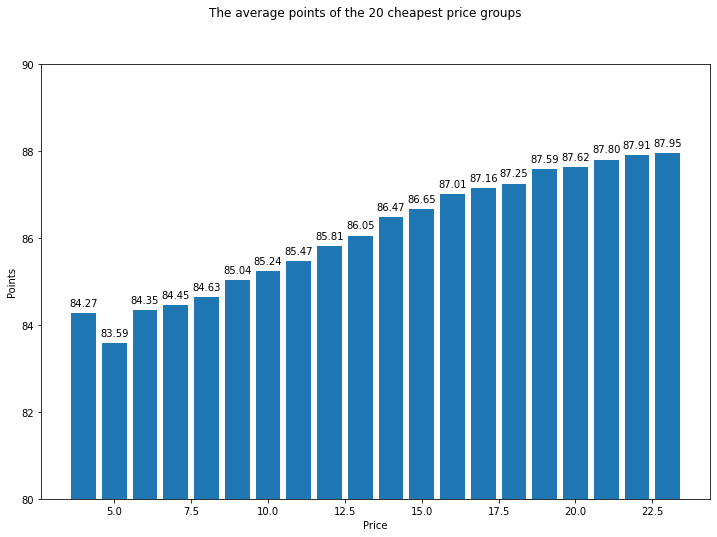

In [124]:
plt.figure(figsize=(12, 8))
sorted_values = groupedByPrice.tail(20).sort_values('points', ascending = False)
plt.bar(sorted_values.index, sorted_values['points'], align='center')
plt.gca().set_ylim([80, 90])
plt.ylabel('Points')
plt.xlabel('Price')
plt.suptitle('The average points of the 20 cheapest price groups')
add_value_labels(plt.gca())
plt.show()

(80.0, 100.0)

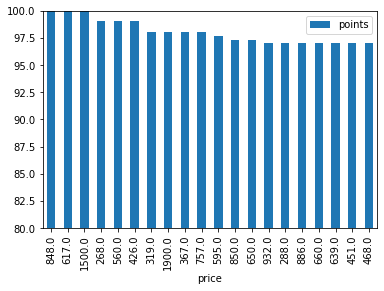

In [125]:
groupedByPrice.sort_values('points', ascending = False).head(20).plot(kind = "bar")
plt.gca().set_ylim([80, 100])

In [126]:
df.sort_values("price", ascending = False).head(10)

,country,description,designation,points,price,province,region_1,region_2,taster_name,title,variety,winery
74641,France,This ripe wine shows plenty of blackberry frui...,NaN,88,3300.0,Bordeaux,Médoc,NaN,Roger Voss,Château les Ormes Sorbet 2013 Médoc,Bordeaux-style Red Blend,Château les Ormes Sorbet
91505,France,"A superb wine from a great year, this is power...",NaN,96,2500.0,Burgundy,La Romanée,NaN,Roger Voss,Domaine du Comte Liger-Belair 2010 La Romanée,Pinot Noir,Domaine du Comte Liger-Belair
14738,France,The wine is a velvet glove in an iron fist. Th...,NaN,96,2500.0,Bordeaux,Pomerol,NaN,Roger Voss,Château Pétrus 2014 Pomerol,Bordeaux-style Red Blend,Château Pétrus
111978,US,The nose on this single-vineyard wine from a s...,Roger Rose Vineyard,91,2013.0,California,Arroyo Seco,Central Coast,Matt Kettmann,Blair 2013 Roger Rose Vineyard Chardonnay (Arr...,Chardonnay,Blair
60656,France,This extravagantly perfumed wine has great jui...,NaN,97,2000.0,Bordeaux,Pomerol,NaN,Roger Voss,Château Pétrus 2011 Pomerol,Bordeaux-style Red Blend,Château Pétrus
105586,France,"A wonderfully complete wine, with all the elem...",NaN,96,2000.0,Burgundy,La Romanée,NaN,Roger Voss,Domaine du Comte Liger-Belair 2005 La Romanée,Pinot Noir,Domaine du Comte Liger-Belair
1471,France,"A massive wine for Margaux, packed with tannin...",NaN,98,1900.0,Bordeaux,Margaux,NaN,Roger Voss,Château Margaux 2009 Margaux,Bordeaux-style Red Blend,Château Margaux
103926,France,"Almost black in color, this stunning wine is g...",NaN,100,1500.0,Bordeaux,Pauillac,NaN,Roger Voss,Château Lafite Rothschild 2010 Pauillac,Bordeaux-style Red Blend,Château Lafite Rothschild
103928,France,This is the finest Cheval Blanc for many years...,NaN,100,1500.0,Bordeaux,Saint-Émilion,NaN,Roger Voss,Château Cheval Blanc 2010 Saint-Émilion,Bordeaux-style Red Blend,Château Cheval Blanc
1487,France,"The purest Cabernet Sauvignon fruit, with dark...",NaN,96,1300.0,Bordeaux,Pauillac,NaN,Roger Voss,Château Mouton Rothschild 2009 Pauillac,Bordeaux-style Red Blend,Château Mouton Rothschild


In [127]:
df[df["points"] == 80].price.mean()

16.372151898734177

In [128]:
df[df["points"] == 90].price.mean()

36.91221959035809

In [129]:
df[df["points"] == 100].price.mean()

485.94736842105266

In [130]:
df[df["price"] > 1000].points.mean()

95.64285714285714

In [131]:
df[df["price"] > 500].points.mean()

95.68131868131869

In [132]:
df[df["price"] > 100].points.mean()

92.82055852644088

In [133]:
df[df["price"] > 10].points.mean()

88.60777933825902

In [134]:
df[df["price"] <= 10].points.mean()

85.02437081873208

In [135]:
df[(df["points"] == 100) & (df["price"] < 100)]

,country,description,designation,points,price,province,region_1,region_2,taster_name,title,variety,winery
105939,US,In 2005 Charles Smith introduced three high-en...,Royal City,100,80.0,Washington,Columbia Valley (WA),Columbia Valley,Paul Gregutt,Charles Smith 2006 Royal City Syrah (Columbia ...,Syrah,Charles Smith
114924,US,Initially a rather subdued Frog; as if it has ...,Bionic Frog,100,80.0,Washington,Walla Walla Valley (WA),Columbia Valley,Paul Gregutt,Cayuse 2008 Bionic Frog Syrah (Walla Walla Val...,Syrah,Cayuse


In [136]:
df2 = df.copy()
df2['points_price_ratio'] = df2['points'] / df2['price']

# best wines by points and price ratio
df2.sort_values('points_price_ratio', ascending = False)

,country,description,designation,points,price,province,region_1,region_2,taster_name,title,variety,winery,points_price_ratio
117313,Romania,Notes of sun-dried hay and green flower highli...,UnWineD,86,4.0,Viile Timisului,NaN,NaN,Anna Lee C. Iijima,Cramele Recas 2011 UnWineD Pinot Grigio (Viile...,Pinot Grigio,Cramele Recas,21.500000
59941,US,"There's a lot going on in this Merlot, which i...",NaN,86,4.0,California,California,California Other,NaN,Bandit NV Merlot (California),Merlot,Bandit,21.500000
19015,US,"Fruity, soft and rather sweet, this wine smell...",NaN,85,4.0,California,Clarksburg,Central Valley,Jim Gordon,Dancing Coyote 2015 White (Clarksburg),White Blend,Dancing Coyote,21.250000
1869,Spain,Berry and cherry aromas are surprisingly sturd...,Flirty Bird,85,4.0,Central Spain,Vino de la Tierra de Castilla,NaN,Michael Schachner,Felix Solis 2013 Flirty Bird Syrah (Vino de la...,Syrah,Felix Solis,21.250000
27416,Argentina,"Crimson in color but also translucent, with a ...",Red,84,4.0,Mendoza Province,Mendoza,NaN,Michael Schachner,Broke Ass 2009 Red Malbec-Syrah (Mendoza),Malbec-Syrah,Broke Ass,21.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
105586,France,"A wonderfully complete wine, with all the elem...",NaN,96,2000.0,Burgundy,La Romanée,NaN,Roger Voss,Domaine du Comte Liger-Belair 2005 La Romanée,Pinot Noir,Domaine du Comte Liger-Belair,0.048000
111978,US,The nose on this single-vineyard wine from a s...,Roger Rose Vineyard,91,2013.0,California,Arroyo Seco,Central Coast,Matt Kettmann,Blair 2013 Roger Rose Vineyard Chardonnay (Arr...,Chardonnay,Blair,0.045206
91505,France,"A superb wine from a great year, this is power...",NaN,96,2500.0,Burgundy,La Romanée,NaN,Roger Voss,Domaine du Comte Liger-Belair 2010 La Romanée,Pinot Noir,Domaine du Comte Liger-Belair,0.038400
14738,France,The wine is a velvet glove in an iron fist. Th...,NaN,96,2500.0,Bordeaux,Pomerol,NaN,Roger Voss,Château Pétrus 2014 Pomerol,Bordeaux-style Red Blend,Château Pétrus,0.038400


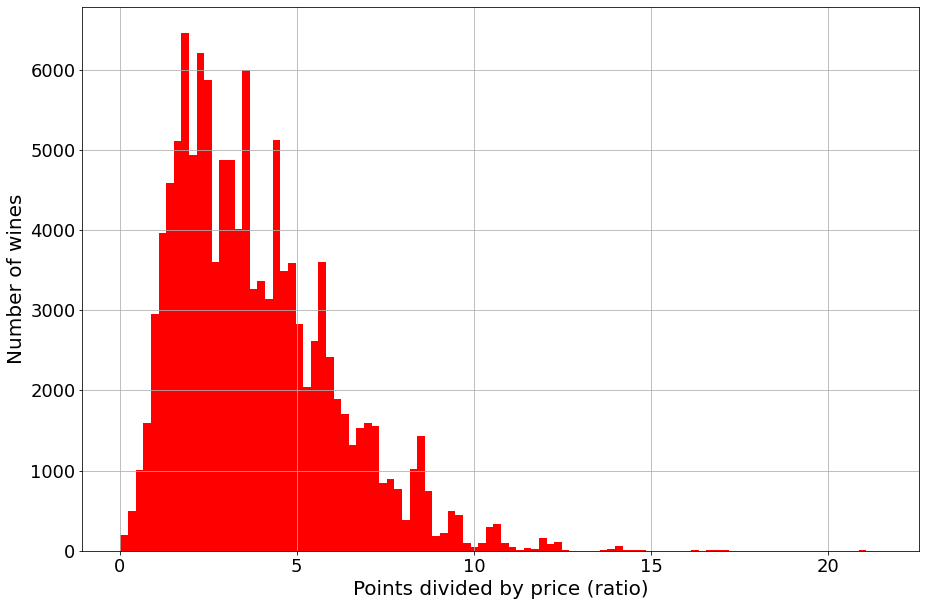

In [137]:
plt.figure(figsize=(15, 10))
df2['points_price_ratio'].hist(bins = 100, color = 'red')
plt.xlabel('Points divided by price (ratio)', fontsize = 20)
plt.ylabel('Number of wines', fontsize = 20)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
plt.show()

In [138]:
df[df["country"] == "France"].points.mean()

88.73486723672367

In [139]:
df[df["country"] == "Italy"].points.mean()

88.61818611800875

In [140]:
df[df["country"] == "Bulgaria"].points.mean()

87.93617021276596

In [141]:
df[df["country"] == "US"].points.mean()

88.56638717405326

In [142]:
df[df["country"] == "Chile"].points.mean()

86.49513023782559

In [143]:
df.variety.value_counts().head(10)

Pinot Noir                  12785
Chardonnay                  11077
Cabernet Sauvignon           9384
Red Blend                    8466
Bordeaux-style Red Blend     5340
Riesling                     4971
Sauvignon Blanc              4780
Syrah                        4086
Rosé                         3261
Merlot                       3061
Name: variety, dtype: int64

In [144]:
import itertools

x = []
y = []
x.append("Pinot Noir")
y.append(df[df["variety"] == "Pinot Noir"].points.mean())
x.append("Chardonnay")
y.append(df[df["variety"] == "Chardonnay"].points.mean())
x.append("Cabernet Sauvignon")
y.append(df[df["variety"] == "Cabernet Sauvignon"].points.mean())
x.append("Red Blend")
y.append(df[df["variety"] == "Red Blend"].points.mean())
x.append("Bordeaux-style Red Blend")
y.append(df[df["variety"] == "Bordeaux-style Red Blend"].points.mean())
x.append("Riesling")
y.append(df[df["variety"] == "Riesling"].points.mean())
x.append("Sauvignon Blanc")
y.append(df[df["variety"] == "Sauvignon Blanc"].points.mean())
x.append("Syrah")
y.append(df[df["variety"] == "Syrah"].points.mean())
x.append("Rosé")
y.append(df[df["variety"] == "Rosé"].points.mean())
x.append("Merlot")
y.append(df[df["variety"] == "Merlot"].points.mean())

y, x = zip(*sorted(zip(y, x), reverse = True))

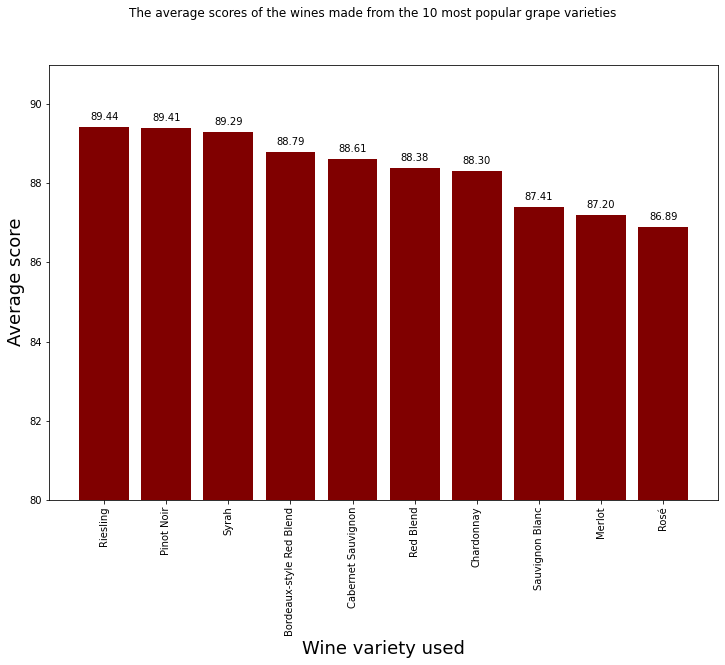

In [145]:
plt.figure(figsize=(12,8))
plt.bar(x, y, align='center', color = 'maroon')
plt.xticks(x, x, rotation = 90)
plt.gca().set_ylim([80, 91])
plt.ylabel('Average score', fontsize = 18)
plt.xlabel('Wine variety used', fontsize = 18)
plt.suptitle('The average scores of the wines made from the 10 most popular grape varieties')
add_value_labels(plt.gca())
plt.show()

In [146]:
x = []
y = []
x.append("Pinot Noir")
y.append(df[df["variety"] == "Pinot Noir"].price.mean())
x.append("Chardonnay")
y.append(df[df["variety"] == "Chardonnay"].price.mean())
x.append("Cabernet Sauvignon")
y.append(df[df["variety"] == "Cabernet Sauvignon"].price.mean())
x.append("Red Blend")
y.append(df[df["variety"] == "Red Blend"].price.mean())
x.append("Bordeaux-style Red Blend")
y.append(df[df["variety"] == "Bordeaux-style Red Blend"].price.mean())
x.append("Riesling")
y.append(df[df["variety"] == "Riesling"].price.mean())
x.append("Sauvignon Blanc")
y.append(df[df["variety"] == "Sauvignon Blanc"].price.mean())
x.append("Syrah")
y.append(df[df["variety"] == "Syrah"].price.mean())
x.append("Rosé")
y.append(df[df["variety"] == "Rosé"].price.mean())
x.append("Merlot")
y.append(df[df["variety"] == "Merlot"].price.mean())

y, x = zip(*sorted(zip(y, x), reverse = True))

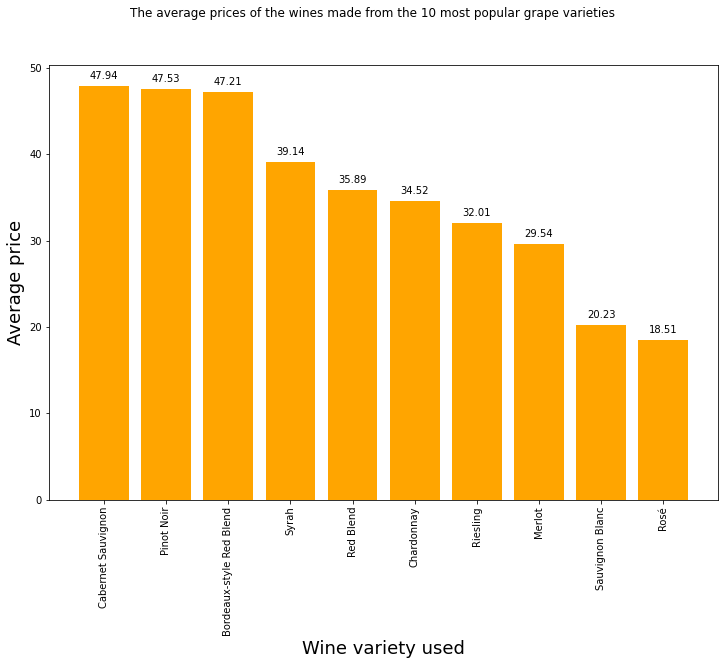

In [147]:
plt.figure(figsize=(12,8))
plt.bar(x, y, align='center', color = 'orange')
plt.xticks(x, x, rotation = 90)
plt.ylabel('Average price', fontsize = 18)
plt.xlabel('Wine variety used', fontsize = 18)
plt.suptitle('The average prices of the wines made from the 10 most popular grape varieties')
add_value_labels(plt.gca())
plt.show()

In [148]:
df.country.value_counts().head(10)

US           54265
France       17776
Italy        16914
Spain         6573
Portugal      4875
Chile         4415
Argentina     3756
Austria       2799
Australia     2294
Germany       2120
Name: country, dtype: int64

In [149]:
x = []
y = []
x.append("US")
y.append(df[df["country"] == "US"].points.mean())
x.append("France")
y.append(df[df["country"] == "France"].points.mean())
x.append("Italy")
y.append(df[df["country"] == "Italy"].points.mean())
x.append("Spain")
y.append(df[df["country"] == "Spain"].points.mean())
x.append("Portugal")
y.append(df[df["country"] == "Portugal"].points.mean())
x.append("Chile")
y.append(df[df["country"] == "Chile"].points.mean())
x.append("Argentina")
y.append(df[df["country"] == "Argentina"].points.mean())
x.append("Austria")
y.append(df[df["country"] == "Austria"].points.mean())
x.append("Australia")
y.append(df[df["country"] == "Australia"].points.mean())
x.append("Germany")
y.append(df[df["country"] == "Germany"].points.mean())

y, x = zip(*sorted(zip(y, x), reverse = True))

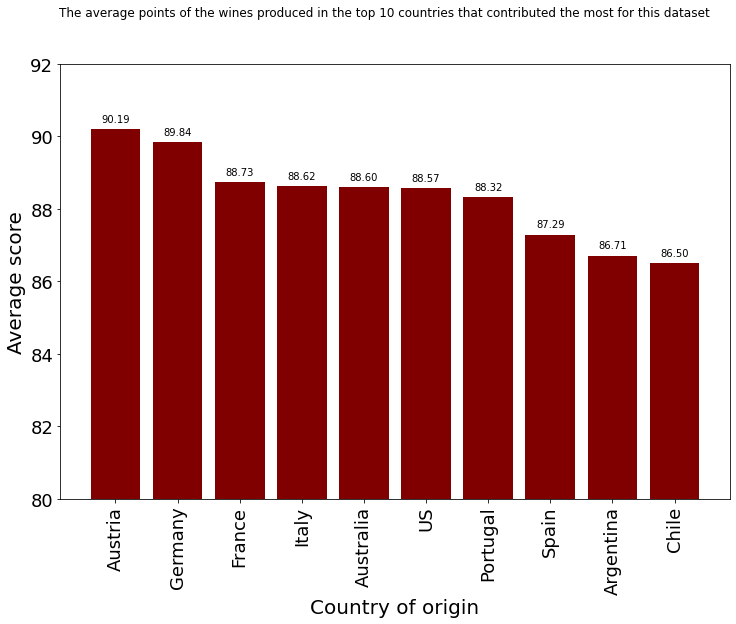

In [150]:
plt.figure(figsize=(12,8))
plt.bar(x, y, align='center', color = 'maroon')
plt.xticks(x, x, rotation = 90)
plt.gca().set_ylim([80, 92])
plt.ylabel('Average score', fontsize = 20)
plt.xlabel('Country of origin', fontsize = 20)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
plt.suptitle('The average points of the wines produced in the top 10 countries that contributed the most for this dataset')
add_value_labels(plt.gca())
plt.show()

In [151]:
x = []
y = []
x.append("US")
y.append(df[df["country"] == "US"].price.mean())
x.append("France")
y.append(df[df["country"] == "France"].price.mean())
x.append("Italy")
y.append(df[df["country"] == "Italy"].price.mean())
x.append("Spain")
y.append(df[df["country"] == "Spain"].price.mean())
x.append("Portugal")
y.append(df[df["country"] == "Portugal"].price.mean())
x.append("Chile")
y.append(df[df["country"] == "Chile"].price.mean())
x.append("Argentina")
y.append(df[df["country"] == "Argentina"].price.mean())
x.append("Austria")
y.append(df[df["country"] == "Austria"].price.mean())
x.append("Australia")
y.append(df[df["country"] == "Australia"].price.mean())
x.append("Germany")
y.append(df[df["country"] == "Germany"].price.mean())

y, x = zip(*sorted(zip(y, x), reverse = True))

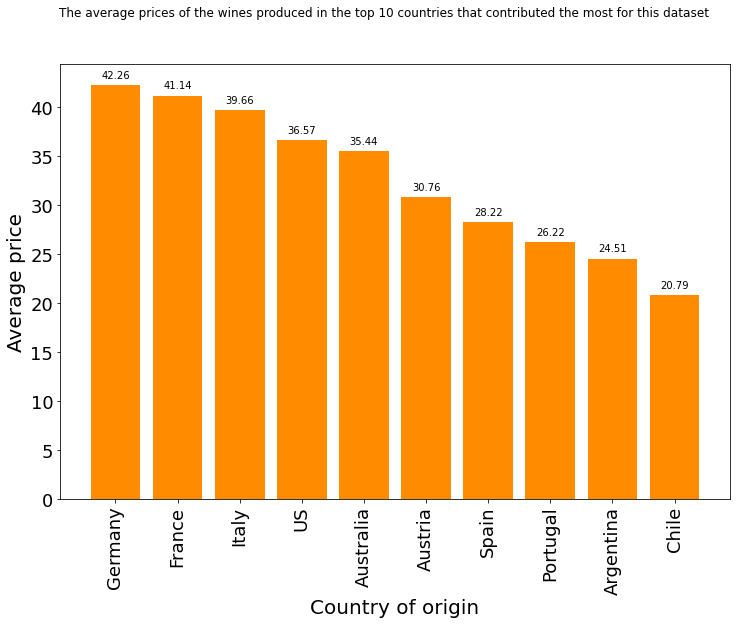

In [152]:
plt.figure(figsize=(12, 8))
plt.bar(x, y, align='center', color = 'darkorange')
plt.xticks(x, x, rotation = 90)
plt.ylabel('Average price', fontsize = 20)
plt.xlabel('Country of origin', fontsize = 20)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
plt.suptitle('The average prices of the wines produced in the top 10 countries that contributed the most for this dataset')
add_value_labels(plt.gca())
plt.show()

In [88]:
country_means = df.groupby("country").mean()
country_means['ratio'] = country_means['points'] / country_means['price']
country_means_sorted = country_means.sort_values('ratio', ascending = False)
country_means_sorted

,points,price,ratio
country,,,
Ukraine,84.071429,9.214286,9.124031
Bosnia and Herzegovina,86.500000,12.500000,6.920000
India,90.222222,13.333333,6.766667
Armenia,87.500000,14.500000,6.034483
Bulgaria,87.936170,14.645390,6.004358
Romania,86.400000,15.241667,5.668671
Macedonia,86.833333,15.583333,5.572193
Slovakia,87.000000,16.000000,5.437500
Cyprus,87.181818,16.272727,5.357542


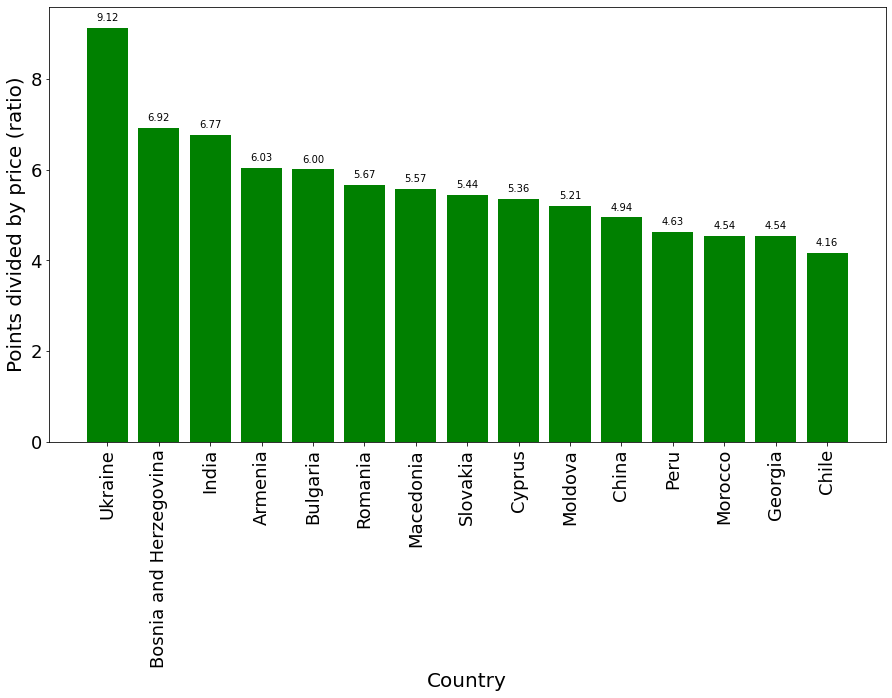

In [154]:
plt.figure(figsize=(15, 8))
plt.bar(country_means_sorted.head(15).index, country_means_sorted.head(15).ratio, color = 'green')
plt.xticks(rotation = 90)
plt.ylabel('Points divided by price (ratio)', fontsize = 20)
plt.xlabel('Country', fontsize = 20)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
add_value_labels(plt.gca())
plt.show()

In [49]:
by_taster = df.groupby('taster_name').mean()
taster_counts = []
for taster in by_taster.index:
    taster_counts.append(df[df['taster_name'] == taster].shape[0])
by_taster['reviews'] = taster_counts
by_taster.sort_values('reviews', ascending = False)

,points,price,reviews
taster_name,,,
Roger Voss,88.606137,38.649960,20172
Michael Schachner,86.908659,25.230929,14944
Kerin O’Keefe,88.908750,41.953413,9874
Virginie Boone,89.216998,46.621963,9507
Paul Gregutt,89.087396,33.644835,9497
Matt Kettmann,90.033991,38.642136,6237
Joe Czerwinski,88.540519,35.182036,5010
Sean P. Sullivan,88.756751,34.085888,4925
Anna Lee C. Iijima,88.405127,29.790112,4369


In [50]:
df.groupby('region_1').mean().sort_values('points')

,points,price
region_1,,
Ohio,80.000,15.000000
Ramona Valley,80.500,26.500000
Monterey-San Luis Obispo-Santa Barbara,82.000,12.000000
Penisola Sorrentina,82.500,16.500000
Catalonia,82.750,9.500000
...,...,...
Montrachet,96.000,616.142857
Corton-Pougets,96.500,105.500000
Bienvenues Bâtard-Montrachet,96.500,443.000000


# Encoding data for machine learning

In [51]:
# 'one-hot-encoding'
#data_dum = pd.get_dummies(df, columns=['country', 'taster_name', 'province', 'region_2', 'variety'])
#data_dum = data_dum.drop(columns = ['description', 'designation', 'title', 'winery', 'region_1'])
#data_dum

encodables = ['country', 'taster_name', 'province', 'region_1', 'region_2', 'variety', 'winery']
num_data = df.copy()
num_data = num_data.drop(columns = ['description', 'designation', 'title'])

for column in encodables:
    num_data[column] = num_data[column].astype('category')
    num_data[column] = num_data[column].cat.codes


num_data

,country,points,price,province,region_1,region_2,taster_name,variety,winery
0,30,87,15.0,107,-1,-1,15,442,12189
1,39,87,14.0,266,1192,16,14,428,12249
2,39,87,13.0,216,538,-1,0,471,13565
3,39,87,65.0,266,1192,16,14,432,13790
4,36,87,15.0,260,739,-1,12,579,13870
...,...,...,...,...,...,...,...,...,...
120910,16,90,28.0,230,-1,-1,1,471,6126
120911,39,90,75.0,266,769,10,14,432,4411
120912,14,90,30.0,11,21,-1,15,205,5493
120913,14,90,32.0,11,21,-1,15,428,5579


# Points prediction

In [52]:
from sklearn.model_selection import train_test_split

data_x = num_data.copy().drop(columns=['points'])
data_y = num_data.copy()['points']

X_train, X_test, y_train, y_test = train_test_split(data_x, data_y, test_size = 0.3, random_state=1)

print(X_train.shape)
print(y_train.shape)

(84640, 8)
(84640,)


In [53]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

# training different models
models = {"Random forest" : RandomForestClassifier(n_estimators=100).fit(X_train, y_train), 
          "Decision tree" : DecisionTreeClassifier().fit(X_train, y_train), 
          "Linear regression" : LinearRegression().fit(X_train, y_train), 
          "Ridge" : Ridge().fit(X_train, y_train), 
          "Lasso" : Lasso().fit(X_train, y_train), 
          "1 Neighbour" : KNeighborsClassifier(n_neighbors=1).fit(X_train, y_train), 
          "10 Neighbours" : KNeighborsClassifier(n_neighbors=10).fit(X_train, y_train), 
          "Ada boost" : AdaBoostClassifier().fit(X_train, y_train), 
          "Quadratic Discriminant Analysis" : QuadraticDiscriminantAnalysis().fit(X_train, y_train)}
#rf = RandomForestClassifier(n_estimators=100).fit(X_train, y_train)
#dt = DecisionTreeClassifier().fit(X_train, y_train)
#svm_linear = SVC(kernel='linear', probability=True).fit(X_train, y_train) #takes forever to compute
#svm_poly = SVC(kernel='poly', probability=True).fit(X_train, y_train) #takes forever to compute
#svm_rbf = SVC(kernel='rbf', probability=True).fit(X_train, y_train) #takes forever to compute
#linear_regr = LinearRegression().fit(X_train, y_train)
#ridge = Ridge().fit(X_train, y_train)
#lasso = Lasso().fit(X_train, y_train)
#n_neigh_1 = KNeighborsClassifier(n_neighbors=1).fit(X_train, y_train)
#n_neigh_10 = KNeighborsClassifier(n_neighbors=10).fit(X_train, y_train)
#mlp = MLPClassifier(max_iter=300).fit(X_train, y_train) #takes forever to compute
#gauss = GaussianProcessClassifier(1.0 * RBF(1.0)).fit(X_train, y_train) #Requires insane amount of RAM
#ada = AdaBoostClassifier().fit(X_train, y_train)
#quad = QuadraticDiscriminantAnalysis().fit(X_train, y_train)

In [54]:
import math

def MSE(y_target, y_pred):
    return (np.sum((y_target - y_pred)**2)) / y_target.shape[0]

def RMSE(y_target, y_pred):
    return math.sqrt(MSE(y_target, y_pred))

In [55]:
def calculate_total_correct(predictions, methodName):
    
    rounded_predictions = [round(num) for num in predictions]
    total_correct = 0
    for i in range(len(predictions)):
        if rounded_predictions[i] == y_test.iloc[i]:
            total_correct += 1
        
    #print(methodName, "got", total_correct, "assigned points exactly right (" + str(total_correct / len(y_test) * 100) + " %)")
    return total_correct

predictions = dict()
model_names = []
mses = []
rmses = []
total_corrects = []

for methodName in models:
    model_names.append(methodName)
    prediction = models[methodName].predict(X_test)
    predictions[methodName] = prediction
    total_corrects.append(calculate_total_correct(prediction, methodName))
    mses.append(MSE(y_test, prediction))
    rmses.append(RMSE(y_test, prediction))
    

In [56]:
points_pred_df = pd.DataFrame({'model': model_names, 'MSE': mses, 'RMSE': rmses, 'total correct': total_corrects})
points_pred_df['precise accuracy'] = points_pred_df['total correct'] / len(y_test) * 100
points_pred_df.sort_values('RMSE')

,model,MSE,RMSE,total correct,precise accuracy
0,Random forest,6.518263,2.553089,9144,25.207443
1,Decision tree,7.529235,2.743945,8577,23.644383
8,Quadratic Discriminant Analysis,7.719835,2.778459,5760,15.878704
5,1 Neighbour,7.812626,2.795107,8654,23.856651
3,Ridge,7.852932,2.802308,5073,13.984838
2,Linear regression,7.852932,2.802308,5073,13.984838
4,Lasso,7.896127,2.810005,4987,13.747760
6,10 Neighbours,9.611854,3.100299,5828,16.066161
7,Ada boost,37.345003,6.111056,1975,5.444521


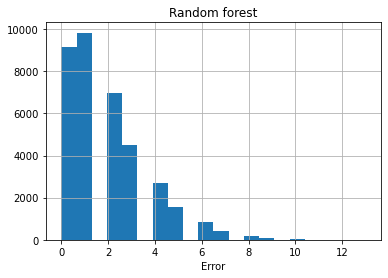

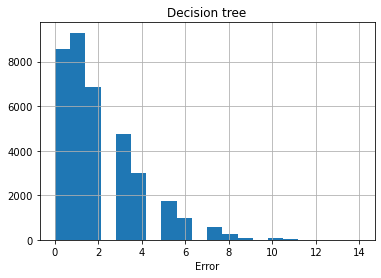

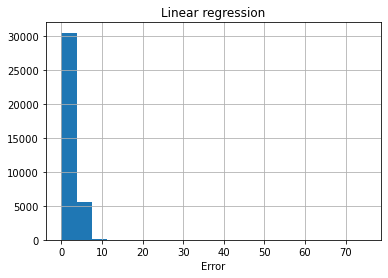

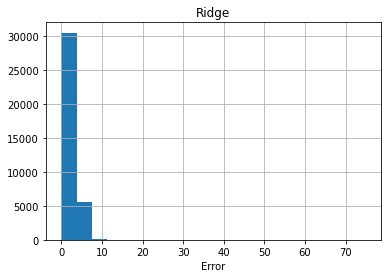

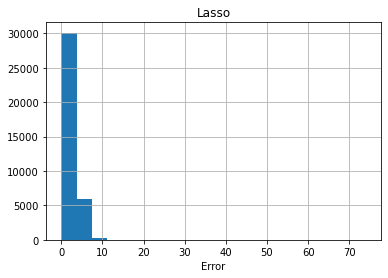

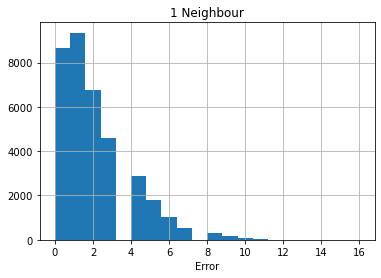

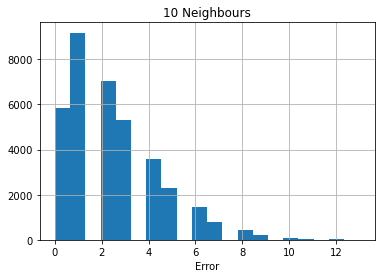

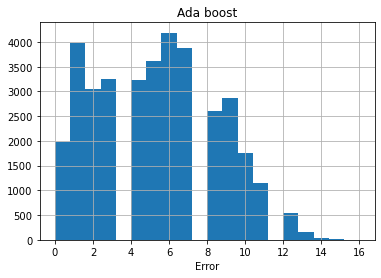

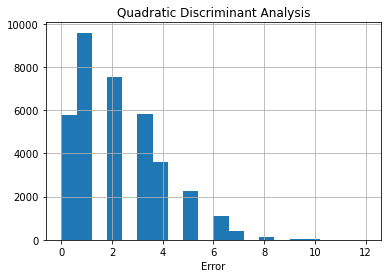

In [57]:
all_errors = dict()
for model, prediction in predictions.items():
    errors = []
    for i in range(len(y_test)):
        errors.append(abs(y_test.iloc[i] - prediction[i]))
    all_errors[model] = errors

all_errors
for model_name, errors in all_errors.items():
    pd.DataFrame(errors).hist(bins = 20)
    plt.title(model_name)
    plt.xlabel("Error")
    plt.show()

# Price prediction

In [58]:
data_x = num_data.copy().drop(columns=['price'])
data_y = num_data.copy()['price']

X_train, X_test, y_train, y_test = train_test_split(data_x, data_y, test_size = 0.3, random_state=1)

print(X_train.shape)
print(y_train.shape)

(84640, 8)
(84640,)


In [59]:
from sklearn.ensemble import GradientBoostingRegressor

# training different models
models = {#"Random forest" : RandomForestClassifier(n_estimators=100).fit(X_train, y_train), #Basically a virus, fills the computer's harddrive to the brim
          #"Decision tree" : DecisionTreeClassifier().fit(X_train, y_train), #Basically a virus, fills the computer's harddrive to the brim
          "Linear regression" : LinearRegression().fit(X_train, y_train),
          "Gradient boosting regressor" : GradientBoostingRegressor(random_state=1).fit(X_train, y_train),
          "Ridge" : Ridge().fit(X_train, y_train), 
          "Lasso" : Lasso().fit(X_train, y_train), 
          "1 Neighbour" : KNeighborsClassifier(n_neighbors=1).fit(X_train, y_train), 
          "10 Neighbours" : KNeighborsClassifier(n_neighbors=10).fit(X_train, y_train), 
          #"Ada boost" : AdaBoostClassifier().fit(X_train, y_train), 
          #"Quadratic Discriminant Analysis" : QuadraticDiscriminantAnalysis().fit(X_train, y_train)
          }

In [60]:
def calculate_total_correct_prices(predictions, methodName):
    
    rounded_predictions = [round(num, 2) for num in predictions]
    total_correct = 0
    for i in range(len(predictions)):
        if rounded_predictions[i] == y_test.iloc[i]:
            total_correct += 1
        
    #print(methodName, "got", total_correct, "assigned points exactly right (" + str(total_correct / len(y_test) * 100) + " %)")
    return total_correct

predictions = dict()
model_names = []
mses = []
rmses = []
total_corrects = []

for methodName in models:
    model_names.append(methodName)
    prediction = models[methodName].predict(X_test)
    predictions[methodName] = prediction
    total_corrects.append(calculate_total_correct_prices(prediction, methodName))
    mses.append(MSE(y_test, prediction))
    rmses.append(RMSE(y_test, prediction))

In [61]:
price_pred_df = pd.DataFrame({'model': model_names, 'MSE': mses, 'RMSE': rmses, 'total correct': total_corrects})
price_pred_df['precise accuracy'] = price_pred_df['total correct'] / len(y_test) * 100
price_pred_df.sort_values('RMSE')

,model,MSE,RMSE,total correct,precise accuracy
1,Gradient boosting regressor,1261.678235,35.520110,15,0.041351
4,1 Neighbour,1683.446919,41.029830,10392,28.647829
0,Linear regression,1750.827961,41.842896,8,0.022054
2,Ridge,1750.828016,41.842897,8,0.022054
3,Lasso,1751.860408,41.855232,12,0.033081
5,10 Neighbours,2039.665389,45.162655,5300,14.610613


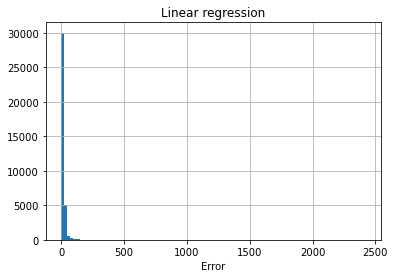

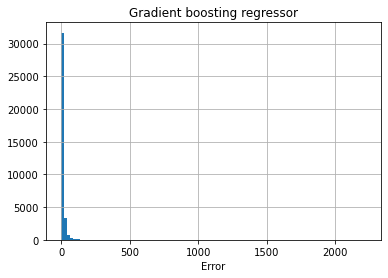

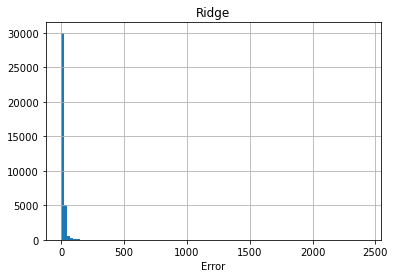

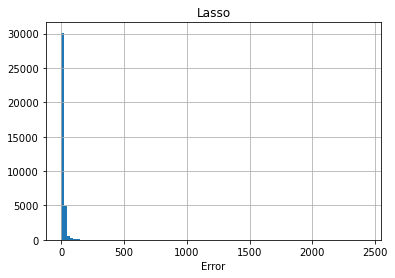

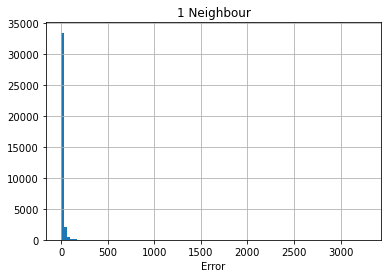

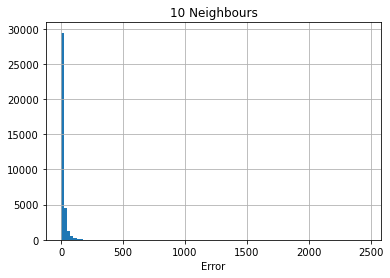

In [62]:
all_errors = dict()
for model, prediction in predictions.items():
    errors = []
    for i in range(len(y_test)):
        errors.append(abs(y_test.iloc[i] - prediction[i]))
    all_errors[model] = errors

all_errors
for model_name, errors in all_errors.items():
    pd.DataFrame(errors).hist(bins = 100)
    plt.title(model_name)
    plt.xlabel("Error")
    plt.show()

# Wine review description statistics

In [63]:
words = dict()
for desc in df['description']:
    for word in desc.split():
        if word in words.keys():
            words[word] += 1
        else:
            words[word] = 1
            
sorted(words.items(), key=lambda word: word[1], reverse = True)

[('and', 326906),
 ('of', 162309),
 ('the', 157121),
 ('a', 146439),
 ('with', 108068),
 ('is', 88032),
 ('this', 67862),
 ('in', 56875),
 ('to', 51584),
 ('wine', 50444),
 ('The', 48716),
 ('on', 41035),
 ('This', 38180),
 ('flavors', 37902),
 ('that', 32267),
 ('aromas', 29323),
 ('it', 29137),
 ('but', 27854),
 ('from', 27649),
 ('fruit', 27584),
 ('palate', 24865),
 ('are', 24396),
 ('black', 22707),
 ('has', 21881),
 ('It', 20865),
 ('A', 20397),
 ('for', 19391),
 ("It's", 19007),
 ('by', 18934),
 ('Drink', 18895),
 ('finish.', 18341),
 ('ripe', 17875),
 ('acidity', 17375),
 ('tannins', 16357),
 ('as', 15860),
 ('cherry', 15857),
 ('red', 15650),
 ('its', 14898),
 ('an', 14546),
 ('notes', 13820),
 ('flavors.', 13245),
 ('finish', 12361),
 ('offers', 11599),
 ('blend', 10830),
 ('spice', 10787),
 ('white', 10567),
 ('fresh', 10545),
 ('rich', 10509),
 ('berry', 10504),
 ('through', 10136),
 ('acidity.', 9985),
 ('wine.', 9685),
 ('wine,', 9633),
 ('shows', 9629),
 ("it's", 9610),


In [64]:
removables = {'and', 'of', 'the', 'a', 'with', 'is', 'this', 'in', 'to', 'It', 'A', 'for', 'by', 'or', 'be', 'not',
              'The', 'on', 'This', 'that', 'it', 'but', 'from', 'are', 'has', "It's", 'as', 'its', "it's", 'at'}
for word in removables:
    words.pop(word, None)

sorted(words.items(), key=lambda word: word[1], reverse = True)
#len(words)

[('wine', 50444),
 ('flavors', 37902),
 ('aromas', 29323),
 ('fruit', 27584),
 ('palate', 24865),
 ('black', 22707),
 ('Drink', 18895),
 ('finish.', 18341),
 ('ripe', 17875),
 ('acidity', 17375),
 ('tannins', 16357),
 ('cherry', 15857),
 ('red', 15650),
 ('an', 14546),
 ('notes', 13820),
 ('flavors.', 13245),
 ('finish', 12361),
 ('offers', 11599),
 ('blend', 10830),
 ('spice', 10787),
 ('white', 10567),
 ('fresh', 10545),
 ('rich', 10509),
 ('berry', 10504),
 ('through', 10136),
 ('acidity.', 9985),
 ('wine.', 9685),
 ('wine,', 9633),
 ('shows', 9629),
 ('nose', 9481),
 ('while', 9368),
 ('plum', 9162),
 ('Cabernet', 9012),
 ('oak', 8952),
 ('cherry,', 8790),
 ('tannins.', 8749),
 ('more', 8651),
 ('apple', 8640),
 ('sweet', 8281),
 ('dark', 8245),
 ('citrus', 8110),
 ('crisp', 8018),
 ('dry', 8013),
 ('very', 7810),
 ('some', 7759),
 ('touch', 7651),
 ('blackberry', 7545),
 ('well', 7508),
 ('green', 7505),
 ('palate,', 7497),
 ('fruit,', 7370),
 ('now.', 7304),
 ('light', 7298),
 ('

In [82]:
dfs = []
dfs.append(df[df['description'].str.contains('fruit', case = True, regex = True)])
dfs.append(df[df['description'].str.contains('dry')])
dfs.append(df[df['description'].str.contains('black')])
dfs.append(df[df['description'].str.contains('ripe')])
dfs.append(df[df['description'].str.contains('spicy')])
dfs.append(df[df['description'].str.contains('cherry')])
dfs.append(df[df['description'].str.contains('rich')])
dfs.append(df[df['description'].str.contains('oak')])
dfs.append(df[df['description'].str.contains('plum')])
dfs.append(df[df['description'].str.contains('apple')])
dfs.append(df[df['description'].str.contains('dark')])
dfs.append(df[df['description'].str.contains('citrus')])
dfs.append(df[df['description'].str.contains('crisp')])
dfs.append(df[df['description'].str.contains('sweet')])
dfs.append(df[df['description'].str.contains('blackberry')])
dfs.append(df[df['description'].str.contains('vanilla')])
dfs.append(df[df['description'].str.contains('lemon')])
dfs.append(df[df['description'].str.contains('raspberry')])
dfs.append(df[df['description'].str.contains('chocolate')])
dfs.append(df[df['description'].str.contains('herbal')])
dfs.append(df[df['description'].str.contains('wood')])
dfs.append(df[df['description'].str.contains('savory')])
dfs.append(df[df['description'].str.contains('tropical')])
dfs.append(df[df['description'].str.contains('tobacco')])
dfs.append(df[df['description'].str.contains('smoky')])
dfs.append(df[df['description'].str.contains('melon')])
dfs.append(df[df['description'].str.contains('grapefruit')])
dfs.append(df[df['description'].str.contains('floral')])
dfs.append(df[df['description'].str.contains('coffee')])
dfs.append(df[df['description'].str.contains('leather')])
dfs.append(df[df['description'].str.contains('toasted')])
dfs.append(df[df['description'].str.contains('clove')])
dfs.append(df[df['description'].str.contains('bitter')])
dfs.append(df[df['description'].str.contains('tangy')])

words = ['fruit', 'dry', 'black', 'ripe', 'spicy', 'cherry', 'rich', 'oak',
         'plum', 'apple', 'dark', 'citrus', 'crisp', 'sweet', 'blackberry',
         'vanilla', 'lemon', 'raspberry', 'chocolate', 'herbal', 'wood', 'savory',
         'tropical', 'tobacco', 'smoky', 'melon', 'grapefruit', 'floral',
         'coffee', 'leather', 'toasted', 'clove', 'bitter', 'tangy']
point_means = []
price_means = []
for dataframe in dfs:
    point_means.append(round(dataframe.points.mean(), 2))
    price_means.append(round(dataframe.price.mean(), 2))
    
differences = pd.DataFrame({'word': words, 'point means': point_means, 'price means': price_means})

In [83]:
differences.sort_values('point means', ascending = False)

,word,point means,price means
10,dark,89.80,46.79
6,rich,89.77,44.35
31,clove,89.65,46.48
23,tobacco,89.59,49.36
21,savory,89.47,38.12
18,chocolate,89.44,46.10
2,black,89.31,43.69
29,leather,89.27,46.74
28,coffee,89.23,45.15
24,smoky,89.21,42.21


In [84]:
differences.sort_values('price means')

,word,point means,price means
25,melon,87.49,21.52
26,grapefruit,88.51,25.21
11,citrus,88.05,26.68
22,tropical,88.06,27.13
9,apple,88.12,27.74
16,lemon,88.62,28.29
12,crisp,88.05,28.44
19,herbal,87.46,28.87
33,tangy,88.38,29.09
32,bitter,86.87,29.90
